In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [41]:
df = pd.read_csv('fuel-consumption-co2.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [42]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


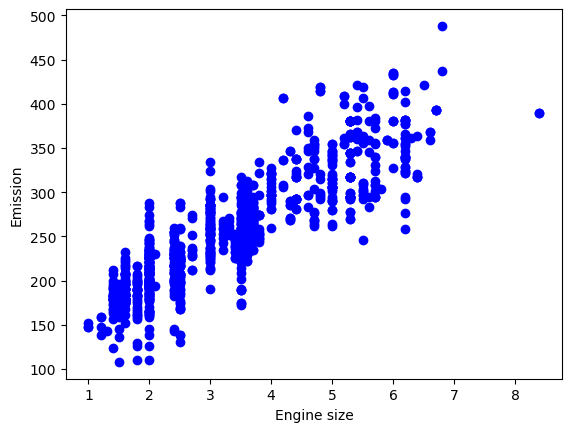

In [43]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cdf, cdf.CO2EMISSIONS, test_size=0.7, random_state=42)


In [45]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
672,5.0,8,11.4,262
119,4.4,8,13.8,317
53,4.2,8,13.4,308
151,2.0,4,10.7,246
403,2.0,4,7.8,179
...,...,...,...,...
330,3.6,6,12.0,276
466,2.4,4,10.0,230
121,4.4,8,13.8,317
1044,1.8,4,8.6,198


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


In [47]:
#train_x = np.asanyarray(cdf[['ENGINESIZE']])
train_x = np.asanyarray(X_train[['ENGINESIZE']])
test_x = np.asanyarray(X_test[['ENGINESIZE']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
#train_x_poly

In [48]:
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 0.         51.2666483  -1.73112835]
Intercept:  106.88036401920672


Text(0, 0.5, 'Emission')

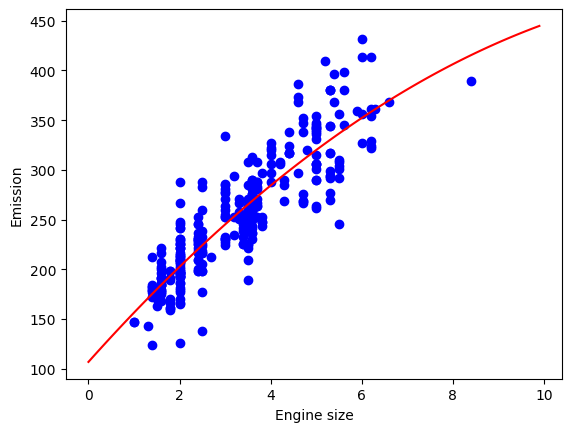

In [49]:
plt.scatter(X_train[['ENGINESIZE']], y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_ + regr.coef_[1]*XX+ regr.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, 'red' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [50]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Mean absolute error: 23.86
Residual sum of squares (MSE): 992.03
R2-score: 0.67
